In [1]:
import sys
import os

# Add project root (one directory above "notebooks") to sys.path
project_path = os.path.abspath("..")
sys.path.append(project_path)

print("Path added:", project_path)

# Import project modules
from src.data_loader import DataLoader
from src.data_cleaner import DataCleaner
from src.analysis import MovieAnalysis
from src.visualizer import Visualizer


Path added: c:\Users\asus\Desktop\blockbuster


In [2]:
df = DataLoader.load_movies("../data/movies_metadata.csv")
df.head()


Data loaded successfully. Rows: 45466


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [3]:
df = DataCleaner.clean(df)
df.head()


c:\Users\asus\Desktop\blockbuster\src\data_cleaner.py:60: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["roi"].replace([np.inf, -np.inf], np.nan, inplace=True)


Dataset cleaned and blockbuster flags created.


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,year,profit,roi,main_genre,bb_revenue,bb_profit,bb_roi,bb_budget,blockbuster_score,is_blockbuster
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995,343554033.0,11.451801,Animation,1,1,1,0,3,True
1,False,NaN,65000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995,197797249.0,3.043035,Adventure,1,1,0,1,3,True
3,False,NaN,16000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995,65452156.0,4.090760,Comedy,0,0,1,0,1,False
5,False,NaN,60000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",NaN,949,tt0113277,en,Heat,"Obsessive master thief, Neil McCauley leads a ...",...,1995,127436818.0,2.123947,Action,0,1,0,1,2,True
8,False,NaN,35000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,9091,tt0114576,en,Sudden Death,International action superstar Jean Claude Van...,...,1995,29350171.0,0.838576,Action,0,0,0,0,0,False


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 5381 entries, 0 to 45422
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   adult                  5381 non-null   object        
 1   belongs_to_collection  1224 non-null   object        
 2   budget                 5381 non-null   float64       
 3   genres                 5381 non-null   object        
 4   homepage               1915 non-null   object        
 5   id                     5381 non-null   object        
 6   imdb_id                5381 non-null   object        
 7   original_language      5381 non-null   object        
 8   original_title         5381 non-null   object        
 9   overview               5370 non-null   object        
 10  popularity             5381 non-null   object        
 11  poster_path            5381 non-null   object        
 12  production_companies   5381 non-null   object        
 13  product

In [5]:
df.describe(include='all')


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,year,profit,roi,main_genre,bb_revenue,bb_profit,bb_roi,bb_budget,blockbuster_score,is_blockbuster
count,5381,1224,5.381000e+03,5381,1915,5381,5381,5381,5381,5370,...,5381.000000,5.381000e+03,5381.000000,5381,5381.000000,5381.000000,5381.000000,5381.000000,5381.000000,5381
unique,1,637,NaN,1300,1881,5375,5375,40,5284,5363,...,NaN,NaN,NaN,21,NaN,NaN,NaN,NaN,NaN,2
top,False,"{'id': 645, 'name': 'James Bond Collection', '...",NaN,"[{'id': 18, 'name': 'Drama'}]",http://www.transformersmovie.com/,22649,tt0022879,en,King Kong,"Winter, 1915. Confined by her family to an asy...",...,NaN,NaN,NaN,Drama,NaN,NaN,NaN,NaN,NaN,False
freq,5381,26,NaN,382,4,2,2,4799,3,2,...,NaN,NaN,NaN,1316,NaN,NaN,NaN,NaN,NaN,4574
mean,NaN,NaN,3.109480e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1999.757666,5.922333e+07,4.288195,NaN,0.100167,0.150158,0.250139,0.205166,0.705631,NaN
min,NaN,NaN,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1915.000000,-1.657101e+08,-0.999096,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,NaN,5.037000e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1994.000000,-1.468000e+06,-0.212956,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,NaN,NaN,1.700000e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2004.000000,1.108426e+07,1.056683,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,NaN,NaN,4.000000e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2011.000000,6.212776e+07,3.244444,NaN,0.000000,0.000000,1.000000,0.000000,1.000000,NaN
max,NaN,NaN,3.800000e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2017.000000,2.550965e+09,168.732304,NaN,1.000000,1.000000,1.000000,1.000000,4.000000,NaN


In [6]:
correlation_matrix = MovieAnalysis.correlation(df)
correlation_matrix


,budget,revenue,profit,roi
budget,1.000000,0.730271,0.581683,-0.118472
revenue,0.730271,1.000000,0.980477,0.075602
profit,0.581683,0.980477,1.000000,0.124117
roi,-0.118472,0.075602,0.124117,1.000000


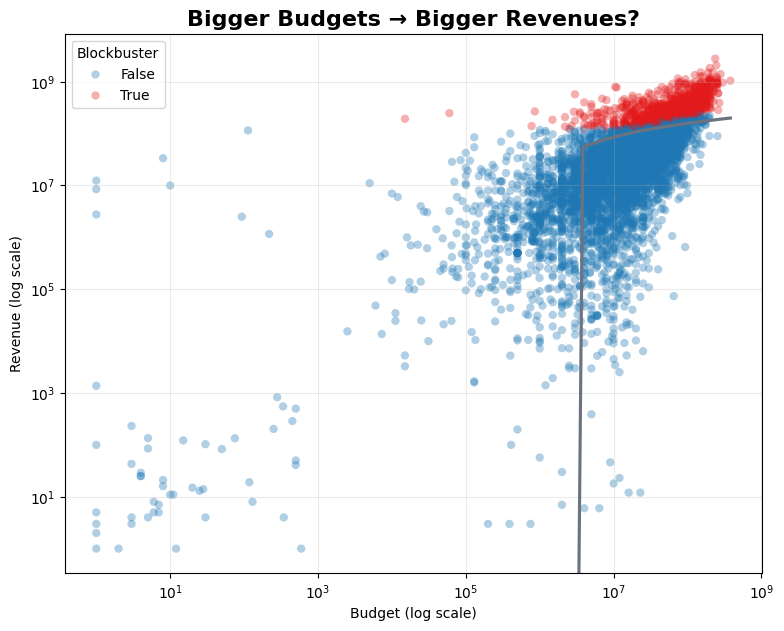

In [7]:
Visualizer.plot_budget_vs_revenue(df)


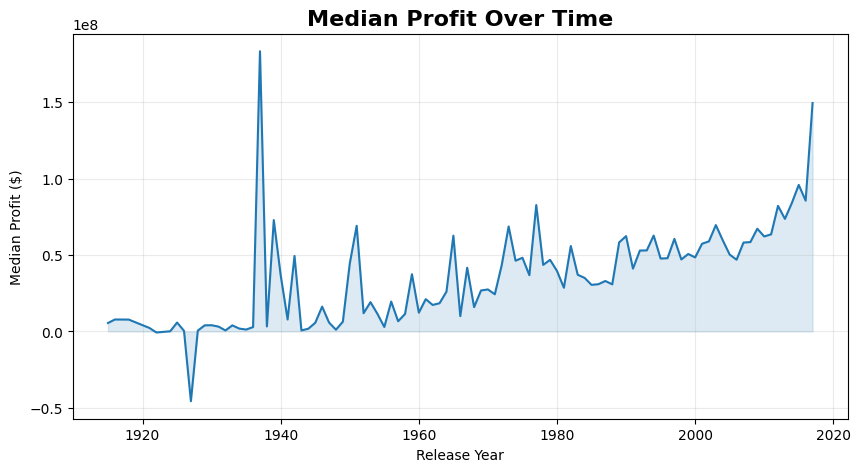

In [8]:
yearly = MovieAnalysis.yearly_profit(df)
Visualizer.plot_yearly_profit(yearly)


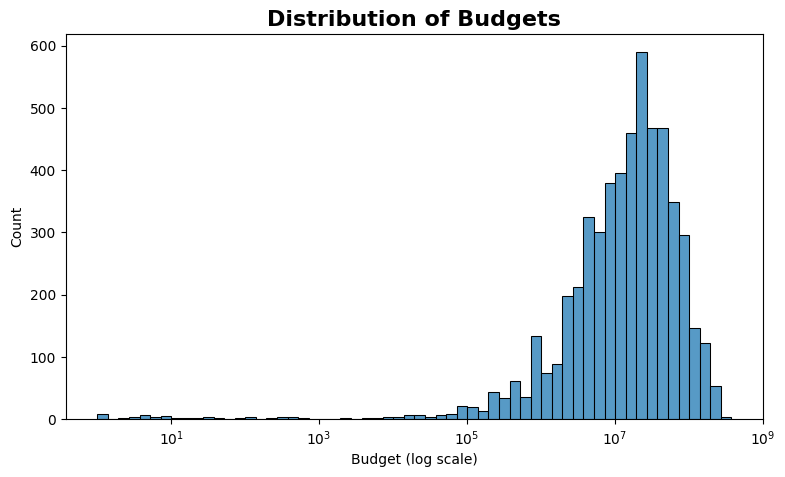

In [9]:
Visualizer.plot_budget_distribution(df)


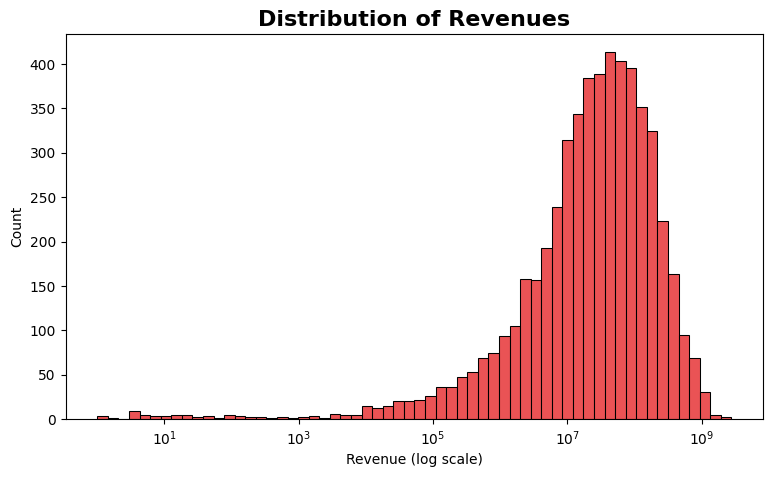

In [10]:
Visualizer.plot_revenue_distribution(df)


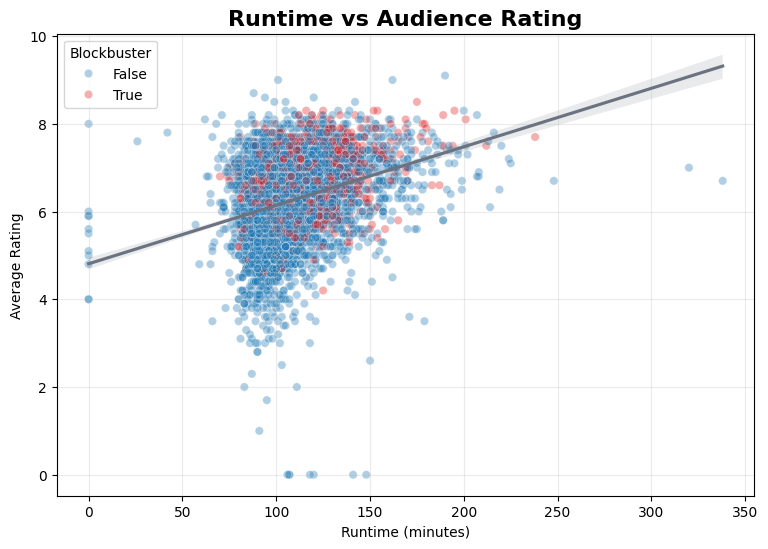

In [11]:
Visualizer.plot_runtime_vs_rating(df)


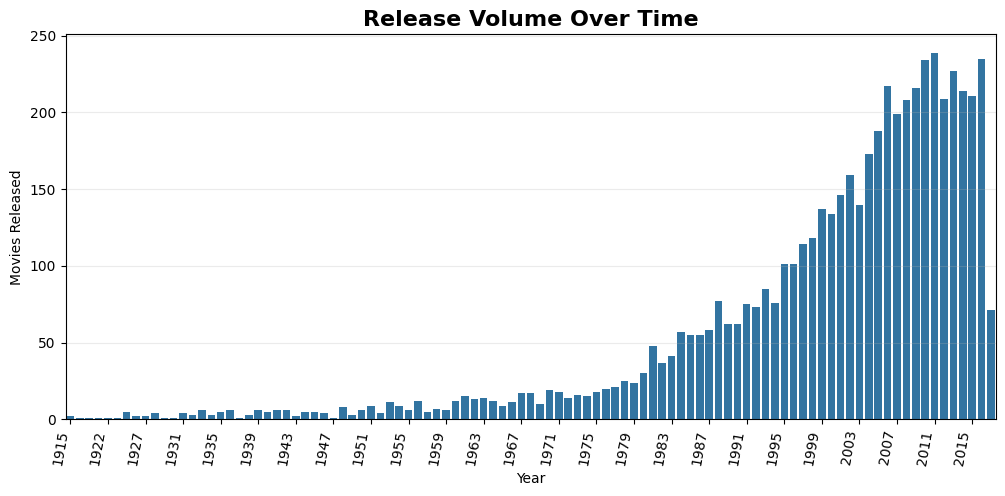

In [12]:
Visualizer.plot_movie_count_by_year(df)


In [13]:
MovieAnalysis.blockbuster_stats(df)


is_blockbuster
False    85.002788
True     14.997212
Name: proportion, dtype: float64

In [14]:
import src.visualizer
print(src.visualizer.__file__)


c:\Users\asus\Desktop\blockbuster\src\visualizer.py


In [15]:
import sys, importlib
sys.modules.pop('src.visualizer', None)


<module 'src.visualizer' from 'c:\\Users\\asus\\Desktop\\blockbuster\\src\\visualizer.py'>

In [16]:
import sys, os
sys.path.append(os.path.abspath(".."))

from src.visualizer import Visualizer


In [17]:
import src.visualizer
print(src.visualizer.__file__)


c:\Users\asus\Desktop\blockbuster\src\visualizer.py


In [18]:
df = DataLoader.load_movies("../data/movies_metadata.csv")
df = DataCleaner.clean(df)


Data loaded successfully. Rows: 45466
Dataset cleaned and blockbuster flags created.


c:\Users\asus\Desktop\blockbuster\src\data_cleaner.py:60: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["roi"].replace([np.inf, -np.inf], np.nan, inplace=True)


c:\Users\asus\Desktop\blockbuster\src\visualizer.py:305: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
c:\Users\asus\Desktop\blockbuster\src\visualizer.py:316: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
c:\Users\asus\Desktop\blockbuster\src\visualizer.py:327: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


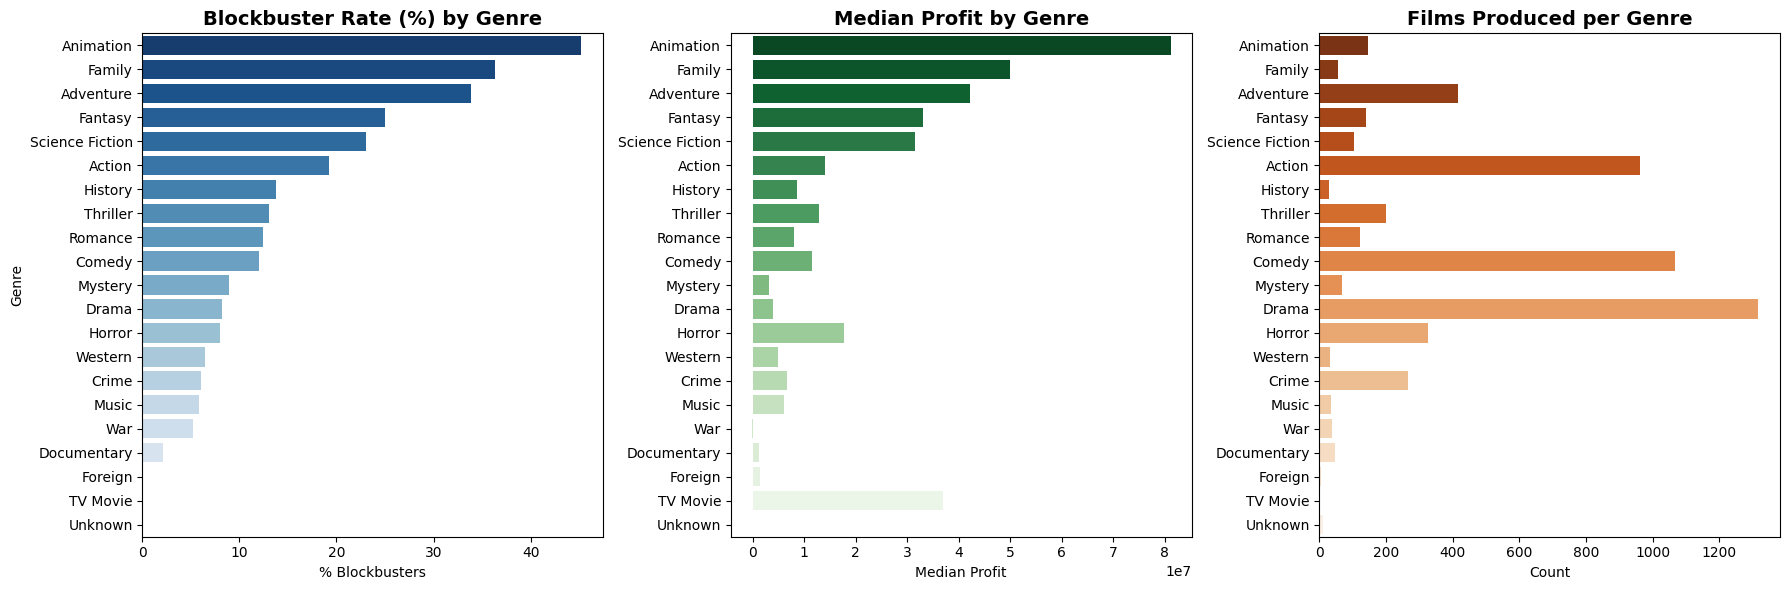

In [19]:
Visualizer.plot_genre_blockbuster_dashboard(df)

Adventure is the strongest all-around genre, combining high success rate, high profits, and a high count of blockbuster films.
Animation and Family films have the highest blockbuster success rates and strongest average profits, despite producing fewer movies.
Action films have a moderate success rate but create the largest number of blockbusters because they dominate overall production volume.

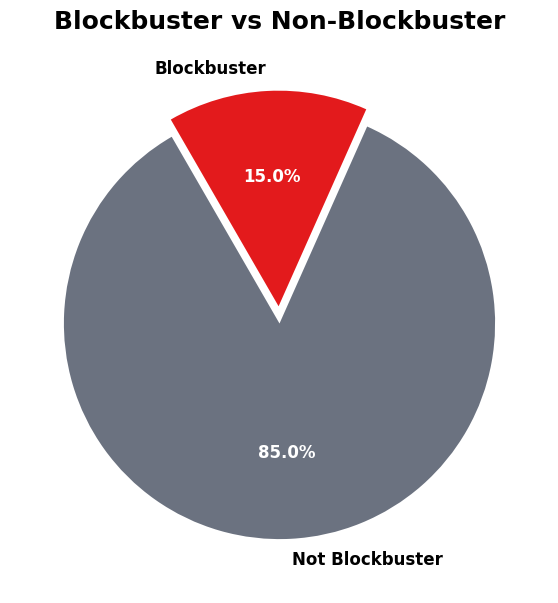

In [20]:
Visualizer.plot_blockbuster_pie(df)


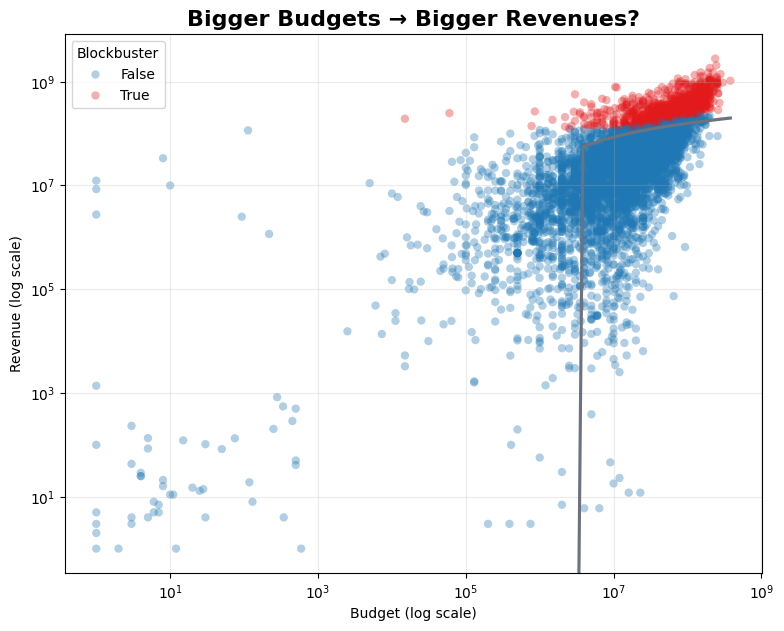

In [21]:
Visualizer.plot_budget_vs_revenue(df)


Financial success in the film industry strongly correlates with higher budgets.

Blockbusters show stable and predictable financial performance compared to regular films.
Blockbusters often make 10× their budget.

everal high-budget outliers that failed financially, proving that large investment does not always guarantee success.

Low-budget films have highly unpredictable outcomes, ranging from major failures to rare breakout successes.

Overall, the data suggests that higher investment significantly increases the likelihood of strong box-office returns. 

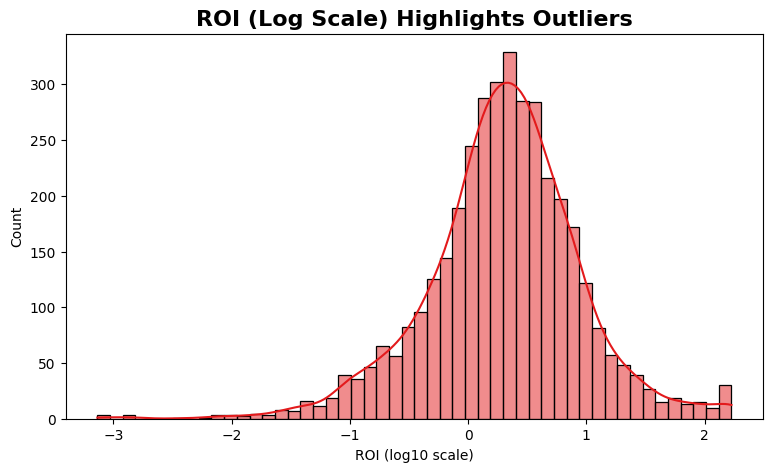

In [22]:
Visualizer.plot_roi_distribution_log(df)

The log-scaled ROI shows a near-normal distribution, meaning most movies cluster around moderate profitability, while a small number achieve extremely high ROI.
Log transformation successfully handles extreme outliers and reveals the true underlying distribution of movie returns.            
ROI = (Revenue – Budget) / Budget


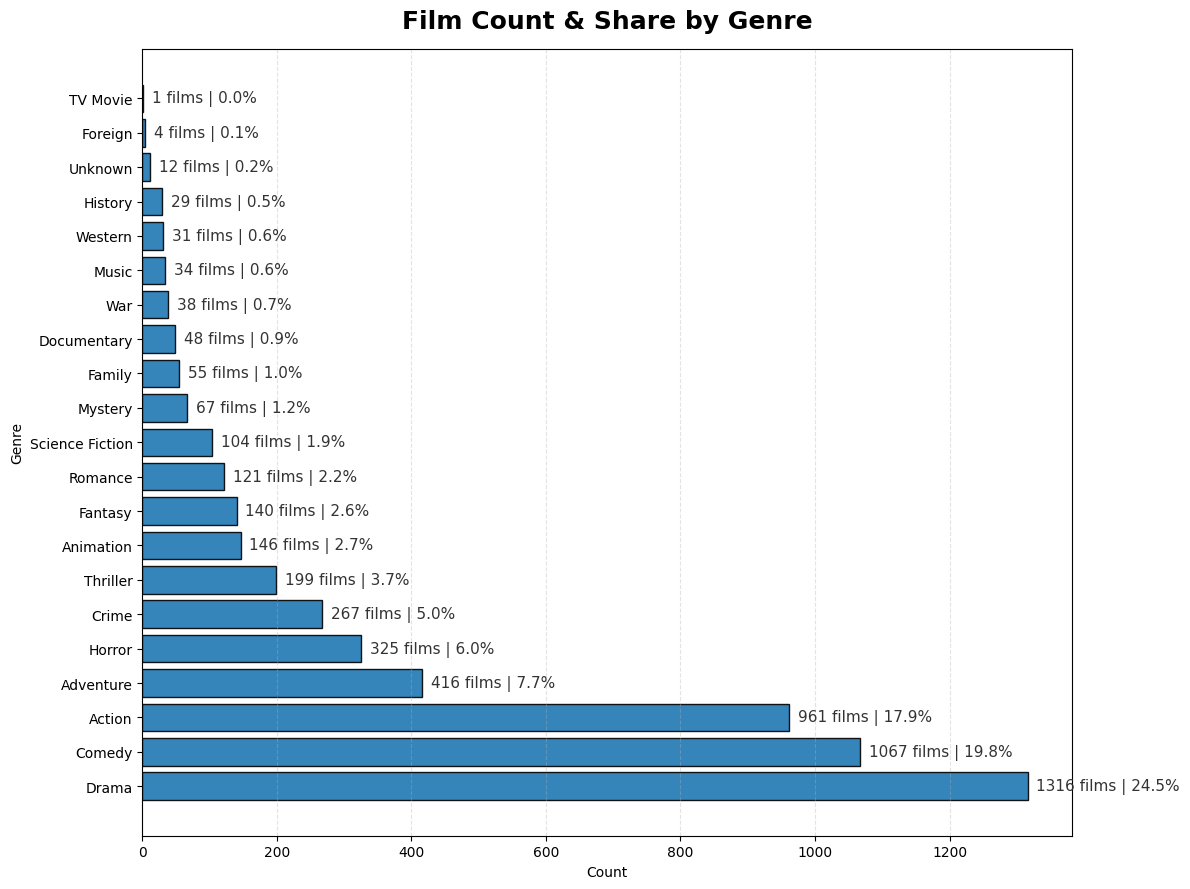

In [23]:
Visualizer.plot_genre_barplot(df)

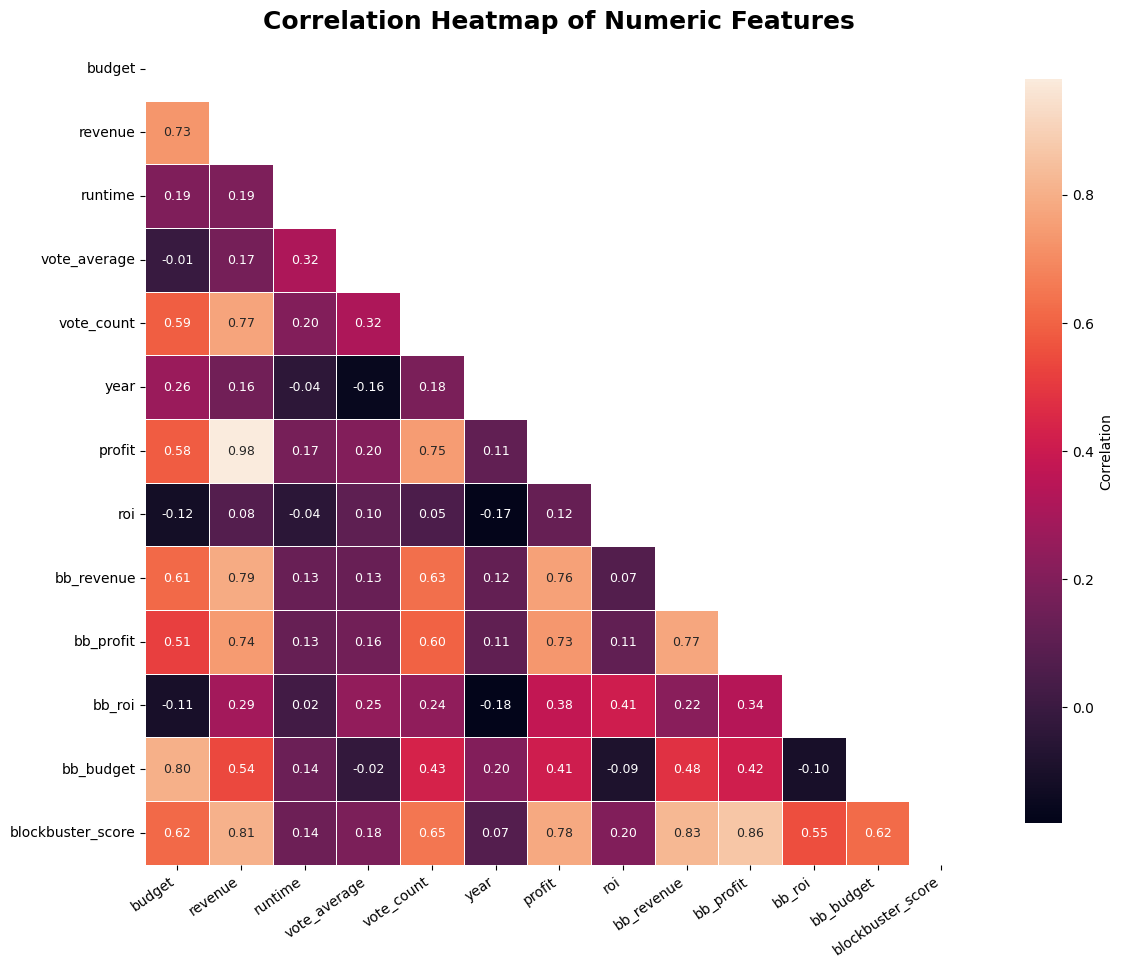

In [24]:
Visualizer.plot_correlation_heatmap(df)